<a href="https://colab.research.google.com/github/alrb2005/MechaineLearing-0716-/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test)= load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


ans: 9


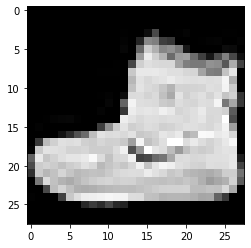

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print("ans:", y_train[idx])
plt.imshow(x_train[idx], cmap="gray")

In [42]:
Labellist={0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

In [ ]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(512, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
save_callback = ModelCheckpoint("mnist.h5", save_best_only=True)
stop_callback = EarlyStopping(patience=5, restore_best_weights=True)
# batch_size: 看幾筆再做一次梯度(平均)下降[20-200]
# validation_split: 切出一部分資料來驗證模型好壞
# epoch: 整份資料要看幾輪
# verbose: 2 不要進度條
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2,
     callbacks=[stop_callback, save_callback])

Epoch 1/50
270/270 - 3s - loss: 0.5355 - accuracy: 0.8155 - val_loss: 0.4209 - val_accuracy: 0.8495
Epoch 2/50
270/270 - 2s - loss: 0.3923 - accuracy: 0.8622 - val_loss: 0.3797 - val_accuracy: 0.8623
Epoch 3/50
270/270 - 2s - loss: 0.3477 - accuracy: 0.8760 - val_loss: 0.3633 - val_accuracy: 0.8655
Epoch 4/50
270/270 - 2s - loss: 0.3195 - accuracy: 0.8833 - val_loss: 0.3322 - val_accuracy: 0.8823
Epoch 5/50
270/270 - 2s - loss: 0.3034 - accuracy: 0.8890 - val_loss: 0.3234 - val_accuracy: 0.8818
Epoch 6/50
270/270 - 2s - loss: 0.2790 - accuracy: 0.8989 - val_loss: 0.3244 - val_accuracy: 0.8838
Epoch 7/50
270/270 - 2s - loss: 0.2689 - accuracy: 0.9017 - val_loss: 0.3074 - val_accuracy: 0.8885
Epoch 8/50
270/270 - 2s - loss: 0.2548 - accuracy: 0.9061 - val_loss: 0.3113 - val_accuracy: 0.8862
Epoch 9/50
270/270 - 2s - loss: 0.2453 - accuracy: 0.9105 - val_loss: 0.3042 - val_accuracy: 0.8892
Epoch 10/50
270/270 - 2s - loss: 0.2365 - accuracy: 0.9135 - val_loss: 0.2986 - val_accuracy: 0.8892

In [ ]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3132 - accuracy: 0.8898


[0.31323033571243286, 0.8898000121116638]

In [41]:
# sklearn: predict(預測類別) predict_proba(預測機率)
# tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre),
       index=["{}(真實)".format(Labellist[i]) for i in range(10)],
       columns=["{}(預測)".format(Labellist[i]) for i in range(10)])

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(真實),851,2,24,22,4,2,89,0,6,0
Trouser(真實),2,975,0,19,2,0,1,0,1,0
Pullover(真實),10,0,813,16,91,0,70,0,0,0
Dress(真實),21,5,10,905,30,0,25,0,4,0
Coat(真實),1,1,89,30,806,0,71,0,2,0
Sandal(真實),0,0,0,1,0,965,0,17,1,16
Shirt(真實),133,1,80,30,49,0,700,0,7,0
Sneaker(真實),0,0,0,0,0,13,0,953,0,34
Bag(真實),8,0,5,5,2,2,7,5,966,0
Ankle boot(真實),0,0,0,0,0,7,1,28,0,964


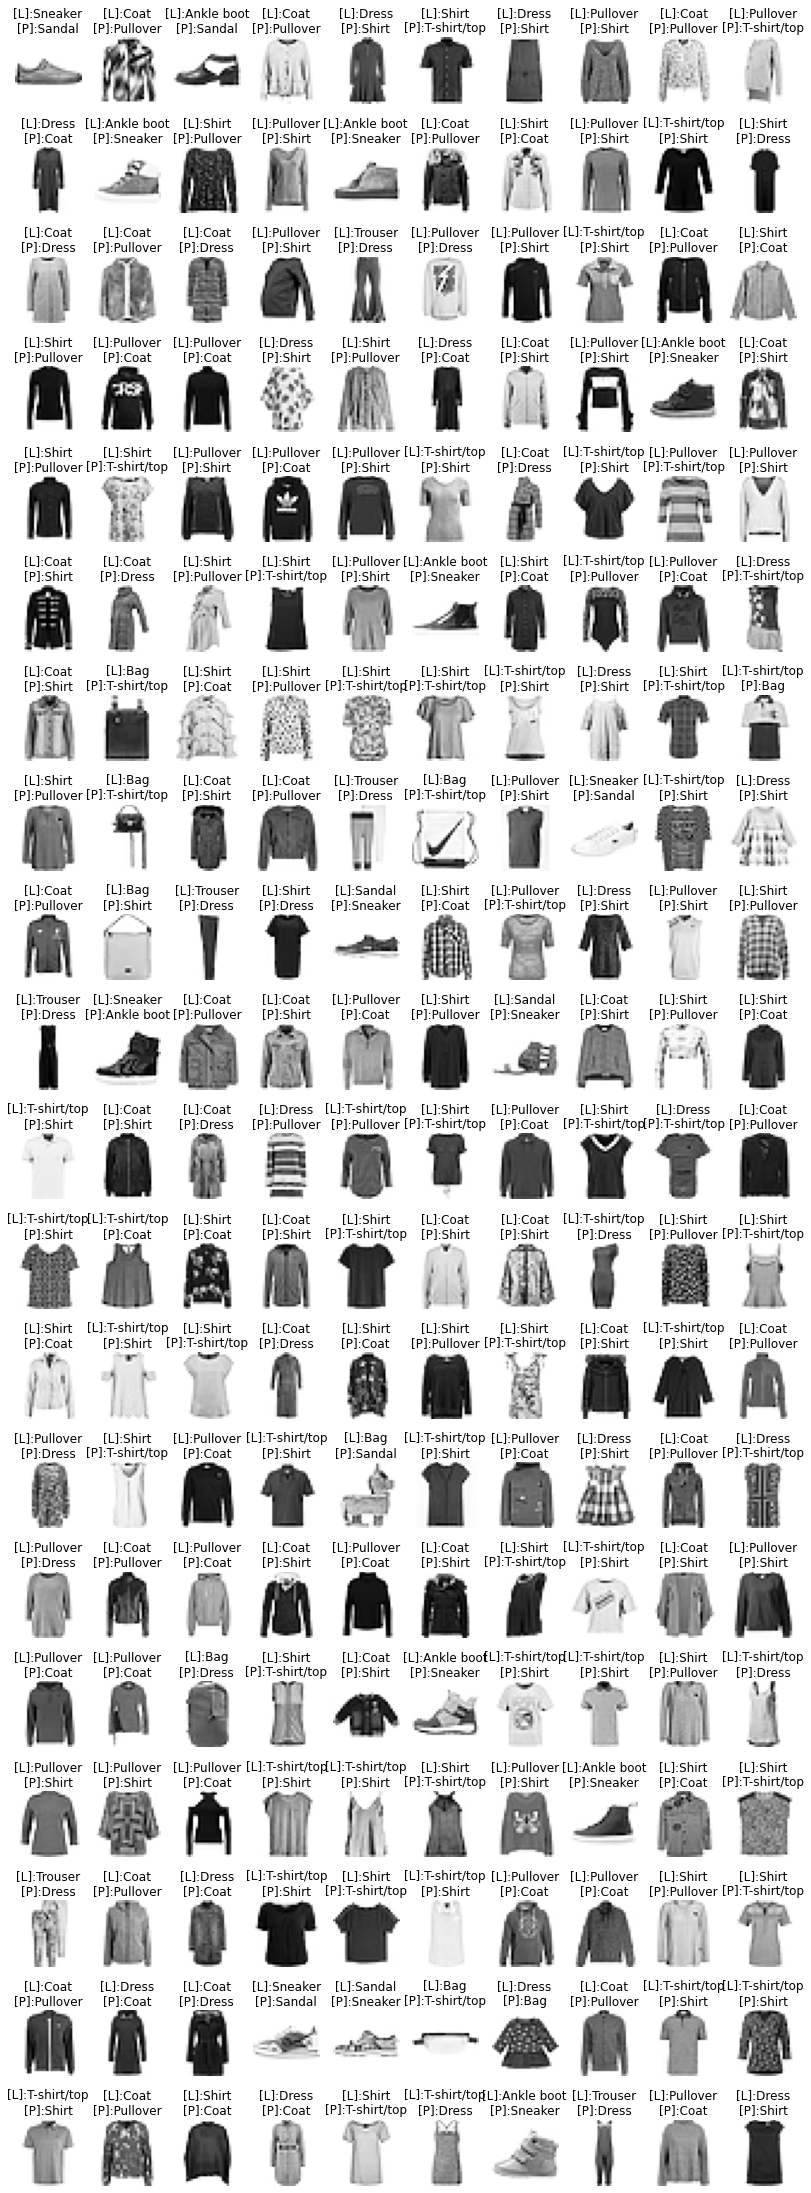

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#np.nonzero(pre != y_test)[0] # 這是一個tuple型式的，第一個array是X，另一個array是Y，這邊只有一維，所以取[0]
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test)[0][:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(Labellist[label], Labellist[p])
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="Greys")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn, target_size=(28, 28)).convert("L")
img_np = np.array(img).reshape(1, 784) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(i, "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Greys")